# Gloabal ocean biogeochemistry

@roltech

Roland: write your goals for this notebook

Roland: write notes on what is not working well

Roland, list 3: write a to-do list

You can write a list like this:
- Item 1
- Item 2

You can write a numbered list:
1. item 1
1. item 2
1. item 3

You can write a to-do list:
- [x] item 1
- [ ] item 2
- [ ] item 3

You can write in _italics_

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [16]:
%matplotlib inline                          
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../Output/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
Outputfiletype='png'

savefig = 1

In [3]:
data_source = r"C:\Users\rolte\Documents\GitHub\satellite_python_2022v2\Global ocean biogeochemistry hindcast\cmems_mod_glo_bgc_my_0.25_P1D-m_1641583635791.nc"

In [4]:
ds = xr.open_dataset(data_source) 

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, depth: 1, latitude: 681, longitude: 1440)
Coordinates:
  * depth      (depth) float32 0.5058
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * time       (time) datetime64[ns] 2020-12-31T12:00:00
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Daily mean fields for product GLOBAL_REANA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-daily
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [9]:
Nitrate = ds.no3
Dissolved_Oxygen = ds.o2
Phosphate = ds.po4
Total_Chlorophyll = ds.chl
Dissolved_Silicate = ds.si
Total_Primary_Production_of_Phyto = ds.nppv


TypeError: Too many arguments to contourf; see help(contourf)

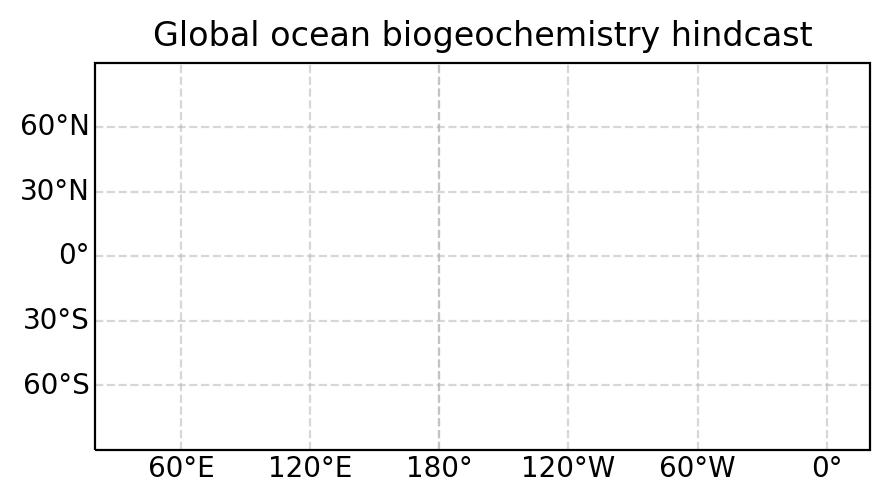

In [18]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global ocean biogeochemistry hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Nitrate), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'SLA.'+Outputfiletype,**savefig_args)               